# Bird Strikes b/w 2000-2011

## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get the data

In [4]:
df = pd.read_excel("Bird Strikes data.xlsx")
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,2011-12-30,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,1500.0,0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,2011-12-30,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0.0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaT,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,2011-12-31,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes


## Data Cleaning

### Basic Data Exploration

- Check the shape of dataset
- Check the head & tail of dataset
- Check the info() of dataset
- Check the null values & duplicate values in dataset
- If there are null values drop null values using dropna()

- check the dtype of columns that are present in dataset
- And then filled "Effect: Impact to flight" and "Conditions: Precipitation" columns by using Mode because there 70% of data is null 

In [144]:
df.shape

(25558, 26)

In [4]:
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [5]:
df.tail()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,2011-12-30,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,1500.0,0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,2011-12-30,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0.0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaT,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,2011-12-31,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes
25557,319593,Airplane,ABRAHAM LINCOLN CAPITAL ARPT,< 1000 ft,B-737-400,1,1,NaN,2011-12-31,Caused damage,...,False,"HIT CENTER OF RADOME, CAVING IN ABOUT 12"". RAD...",Medium,No Cloud,Red-tailed hawk,N,0,0.0,0,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [6]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [7]:
df.isnull().sum().sum()

53929

In [9]:
df.duplicated().sum()

0

In [8]:
df.dropna(subset=["Aircraft: Type","Airport: Name","Altitude bin","Wildlife: Number struck","FlightDate","Aircraft: Number of engines?","Aircraft: Airline/Operator","Origin State","When: Phase of flight","Wildlife: Size","Pilot warned of birds or wildlife?","Feet above ground","Is Aircraft Large?"],inplace=True)

In [9]:
df.drop("Remarks",axis=1,inplace=True)

In [10]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                                 0
Airport: Name                                  0
Altitude bin                                   0
Aircraft: Make/Model                           0
Wildlife: Number struck                        0
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   22752
FlightDate                                     0
Effect: Indicated Damage                       0
Aircraft: Number of engines?                   0
Aircraft: Airline/Operator                     0
Origin State                                   0
When: Phase of flight                          0
Conditions: Precipitation                  22771
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Wildlife: Size                                 0
Conditions: Sky                                0
Wildlife: Species                              0
Pilot warned of bird

In [11]:
df["Effect: Impact to flight"].value_counts()

Effect: Impact to flight
Precautionary Landing    1066
Aborted Take-off          468
Other                     376
Engine Shut Down           85
Name: count, dtype: int64

In [12]:
df["Conditions: Precipitation"].value_counts()

Conditions: Precipitation
Rain               1318
Fog                 475
Snow                 85
Fog, Rain            85
Rain, Snow            6
Fog, Snow             4
Fog, Rain, Snow       3
Name: count, dtype: int64

In [13]:
mode1= df["Effect: Impact to flight"].mode()[0]
df["Effect: Impact to flight"].fillna(mode1, inplace=True)

In [14]:
mode2=df["Conditions: Precipitation"].mode()[0]
df["Conditions: Precipitation"].fillna(mode2,inplace=True)

In [15]:
df.isnull().sum()

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above

In [16]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

## Exploratory Data Analysis

- Visuals Depicting the Number of Bird Strikes
- Yearly Analysis & Bird Strikes in the US
- Top 10 US Airlines in terms of having encountered bird strikes
- Airports with most incidents of bird strikes – Top 50
- Yearly Cost Incurred due to Bird Strikes:
- When do most bird strikes occur?
- Altitude of aeroplanes at the time of strike
- Phase of flight at the time of the strike.
- Average Altitude of the aeroplanes in different phases at the time of strike
- Effect of Bird Strikes & Impact on Flight
- Effect of Strike at Different Altitude


### Analysis of  Number of Bird Strikes

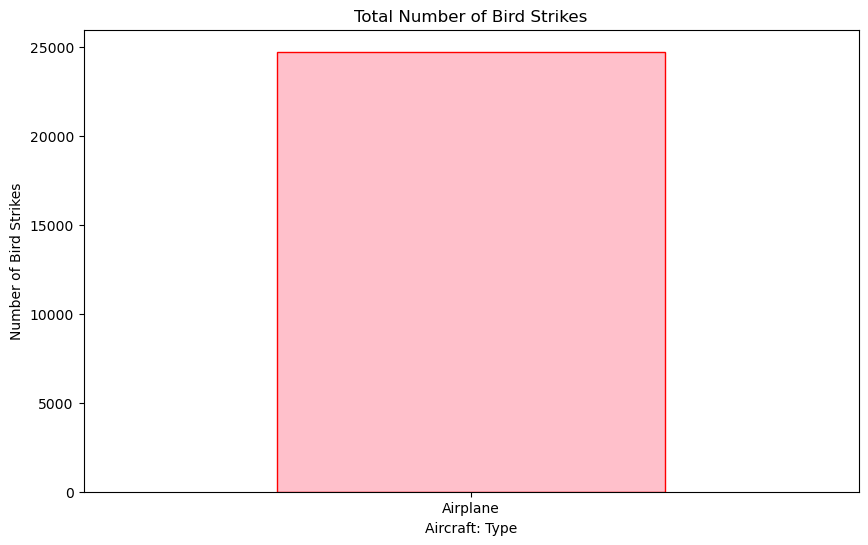

In [197]:
total_birdstrikes = df['Aircraft: Type'].value_counts()
plt.figure(figsize=(10, 6))
total_birdstrikes.plot(kind='bar',color="pink",edgecolor="red")
plt.title('Total Number of Bird Strikes')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0, ha='center')
plt.show()

- From above analysis say's that total number of Bird Strikes around 25,000

### Yearly Analysis & Bird Strikes in the US


In [162]:
df['Year'] = df['FlightDate'].dt.year

In [163]:
df["Year"].unique()

array([2000, 2001, 2002, 2003, 2006, 2004, 2005, 2007, 2008, 2009, 2010,
       2011])

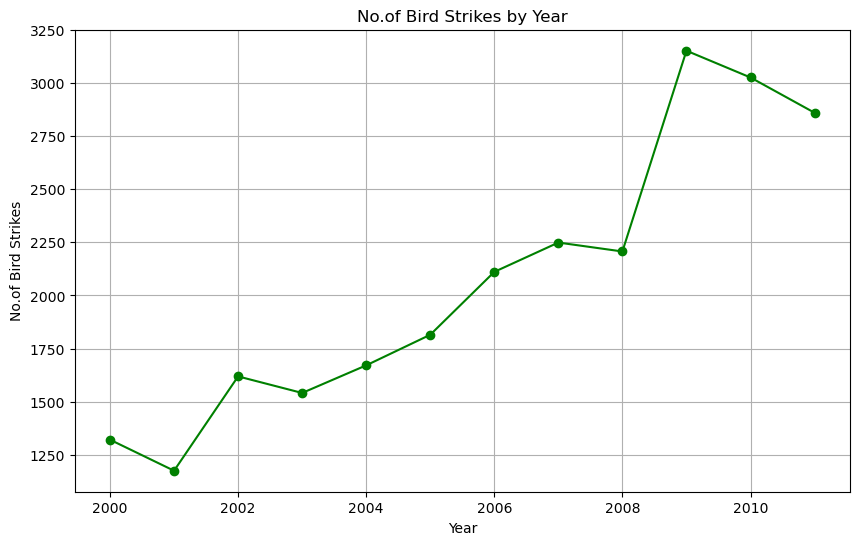

In [171]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year
plt.figure(figsize=(10, 6))
birdstrikes_yearly_US = df.groupby('Year').size()
birdstrikes_yearly_US.plot(kind='line',marker="o",color="green")
plt.title('No.of Bird Strikes by Year')
plt.xlabel('Year')
plt.ylabel('No.of Bird Strikes')
plt.grid(True)
plt.show()


- From above Line chart analysis infers that "Bird Strikes" as been increasing per year since 2000 - 2011 

### Top 10 US Airlines in terms of having encountered bird strikes


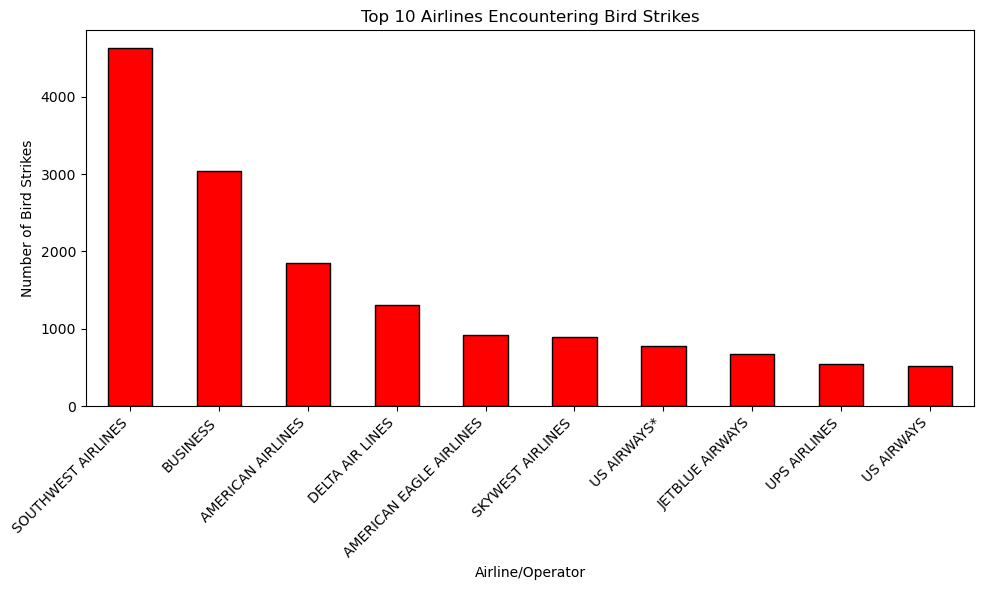

In [211]:
top10_airlines_US = df['Aircraft: Airline/Operator'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top10_airlines_US.plot(kind='bar',color="red",edgecolor="black")
plt.title('Top 10 Airlines Encountering Bird Strikes')
plt.xlabel('Airline/Operator')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- From above Bar chart analysis show's that Top-10 Airplanes that have been encountered "Bird Strikes"

### Airports with most incidents of bird strikes – Top 50


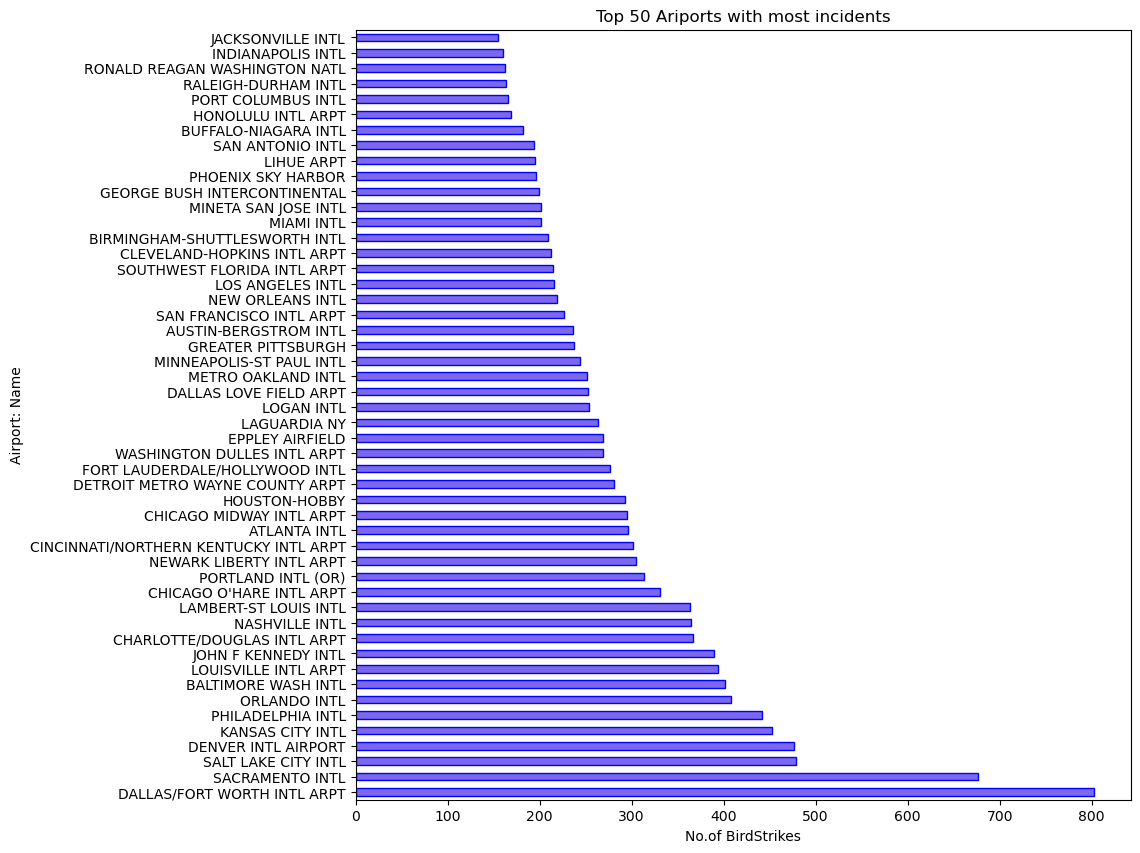

In [204]:
top50_airports = df['Airport: Name'].value_counts().head(50)
plt.figure(figsize=(10, 10))
top50_airports.plot(kind="barh",color="#7B68EE",edgecolor="blue")
plt.title("Top 50 Ariports with most incidents")
plt.xlabel("No.of BirdStrikes")
plt.show()

- From above Barh chart analysis show's that Top-50 Airports name where "Bird Strikes" accrued the most

### Yearly Cost Incurred due to Bird Strikes


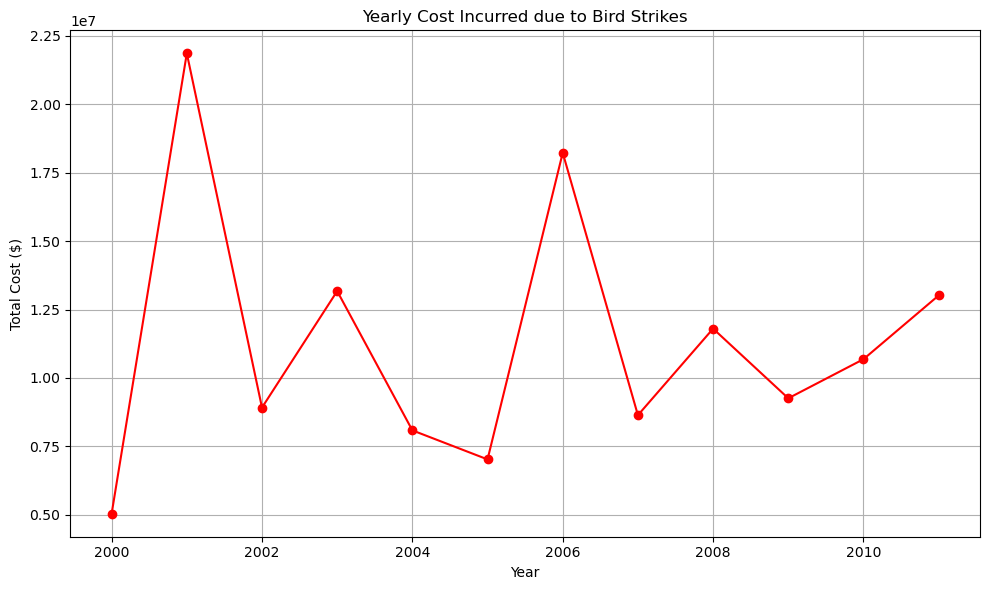

In [193]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year
yearly_cost = df.groupby('Year')['Cost: Total $'].sum()
plt.figure(figsize=(10, 6))
yearly_cost.plot(kind='line', marker='o', color='Red')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


- From above Line chart analysis infers that due to "Bird Strikes" Airplanes has been damaged and undergoes annual cost impact 

### Analysis of  most bird strikes occur in Different Conditions


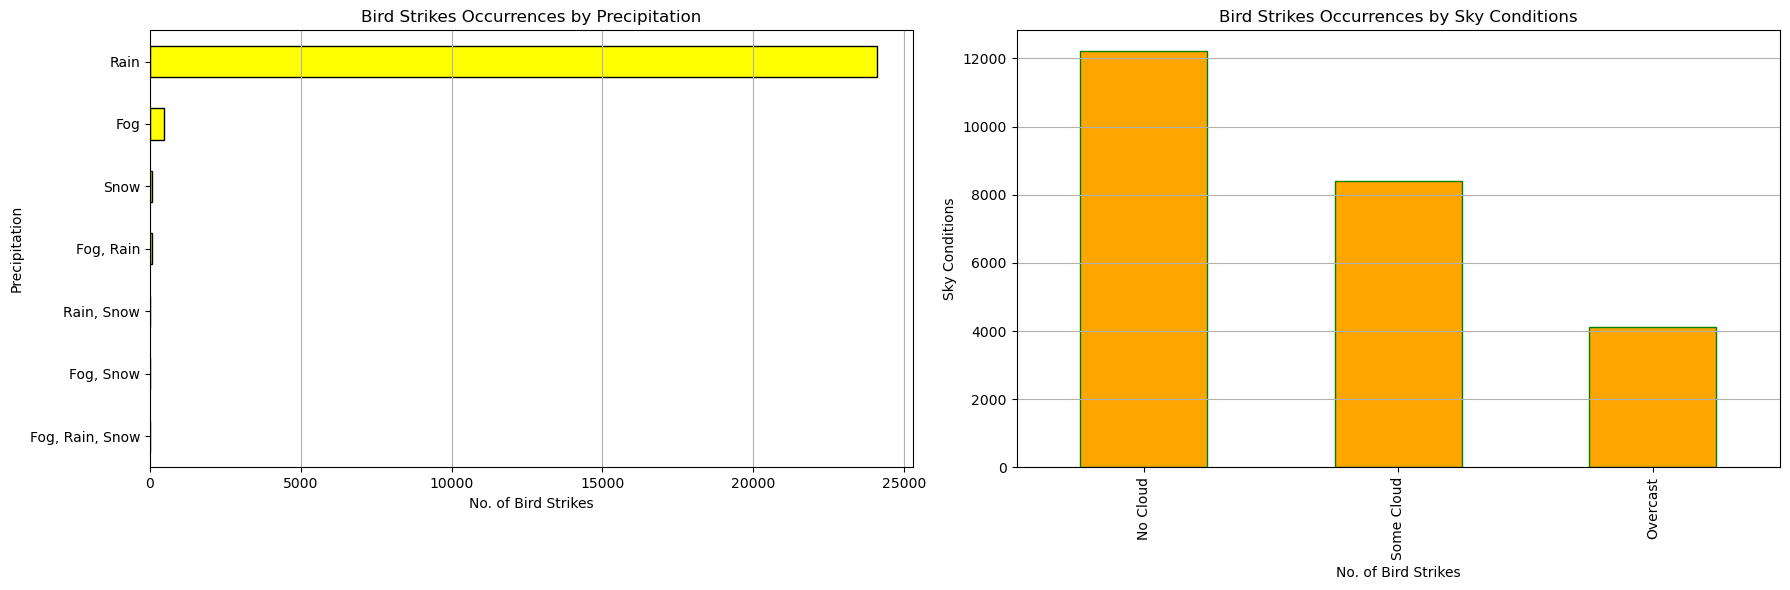

In [215]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Conditions: Precipitation
phase_count_precipitation = df["Conditions: Precipitation"].value_counts()
phase_count_precipitation.plot(kind="barh", color="yellow", edgecolor="black", ax=axs[0])
axs[0].set_title("Bird Strikes Occurrences by Precipitation")
axs[0].set_xlabel("No. of Bird Strikes")
axs[0].set_ylabel("Precipitation")
axs[0].grid(axis='x')
axs[0].invert_yaxis() 

# Conditions: Sky
phase_count_sky = df["Conditions: Sky"].value_counts()
phase_count_sky.plot(kind="bar", color="orange", edgecolor="green", ax=axs[1])
axs[1].set_title("Bird Strikes Occurrences by Sky Conditions")
axs[1].set_xlabel("No. of Bird Strikes")
axs[1].set_ylabel("Sky Conditions")
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()


- From above Subplot we can see that most of "Bird Strikes" accrued during different conditions "Conditions: Precipitation" and "Conditions: Sky"

### Altitude of airplanes at the time of strike

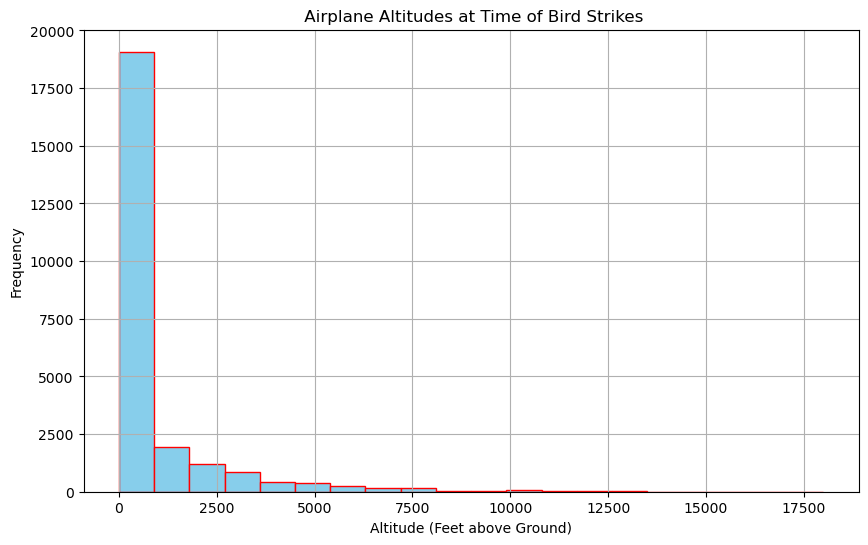

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(df['Feet above ground'], bins=20, color='skyblue', edgecolor='Red')
plt.title(' Airplane Altitudes at Time of Bird Strikes')
plt.xlabel('Altitude (Feet above Ground)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


- From above Histogram chart  we can see that Altitude(Feet above ground ) and the frequency

### Phase of flight at the time of the strike


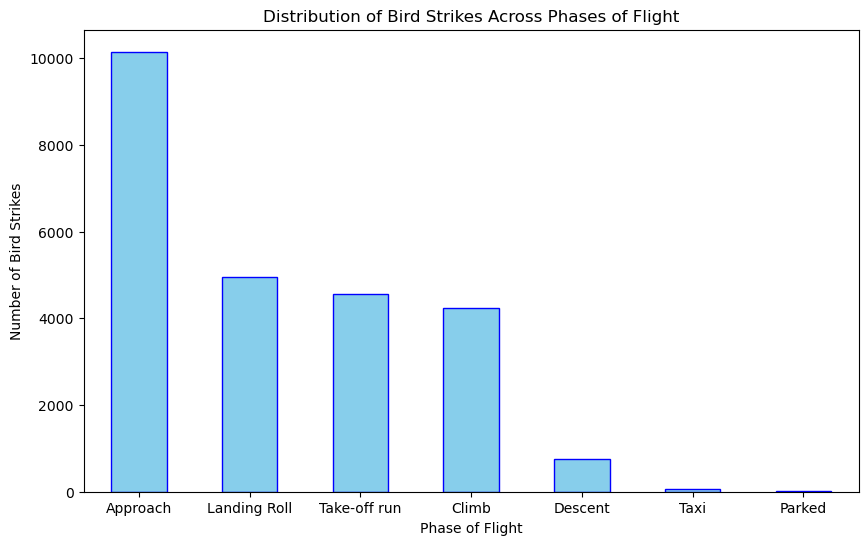

In [213]:
phase_counts = df['When: Phase of flight'].value_counts()
plt.figure(figsize=(10, 6))
phase_counts.plot(kind='bar', color='skyblue',edgecolor="blue")
plt.title('Distribution of Bird Strikes Across Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.show()


- From above Bar chart analysis show's that most of "Bird Strikes" accrued during "Approach", "Landing Roll", "Take-off run" & "Climb" 

### Average Altitude of the airplanes in different phases at the time of strike


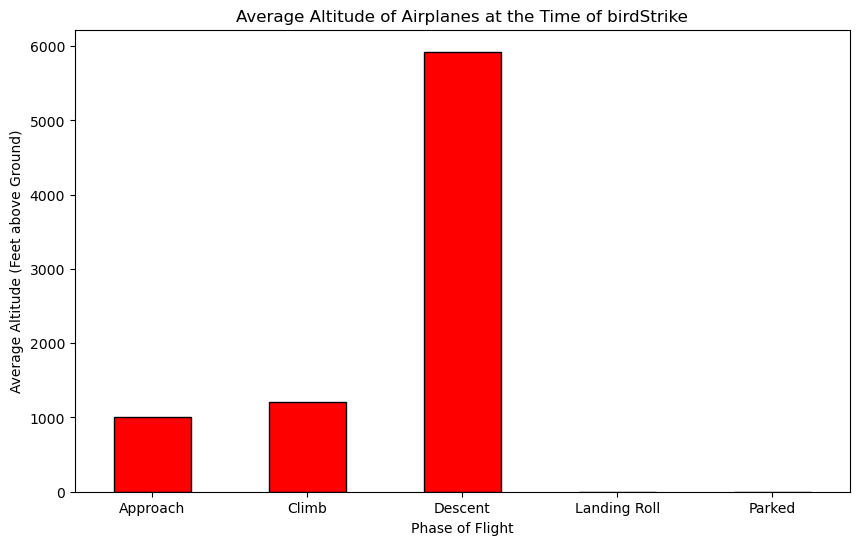

In [214]:
plt.figure(figsize=(10, 6))
avg_altitude= df.groupby('When: Phase of flight')['Feet above ground'].mean().head(5)
avg_altitude.plot(kind='bar', color='red',edgecolor="black")
plt.title('Average Altitude of Airplanes at the Time of birdStrike')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet above Ground)')
plt.xticks(rotation=0)
plt.show()

- From above Bar chart analysis infers that most "Bird Strikes" while plane is in "Descent", "climb", "Approach" and the average altitude of Feet above ground

### Analysis of Bird Strikes Effects & Impact on Flight


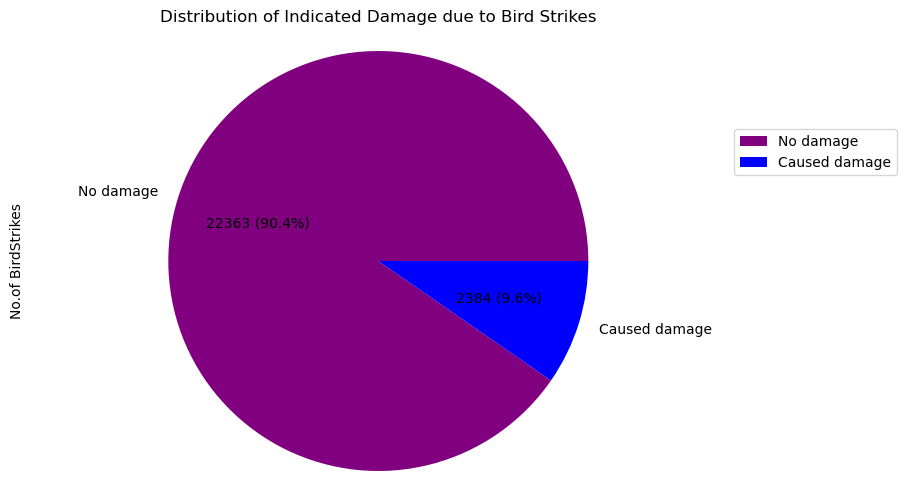

In [18]:
plt.figure(figsize=(9, 6))
damage_counts = df["Effect: Indicated Damage"].value_counts()
plt.pie(damage_counts, labels=damage_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(damage_counts) / 100, p), colors=['purple', 'blue', 'green', 'orange', 'red'])
plt.title("Distribution of Indicated Damage due to Bird Strikes")
plt.ylabel("No.of BirdStrikes")
plt.legend(bbox_to_anchor=(1, 0.8), loc="upper left", labels=damage_counts.index)
plt.axis("equal")  
plt.show()


- From above Pie chart we can observe that Damage of the plane at the time of landing during "Bird Strikes"

### Effect of Strike at Different Altitude

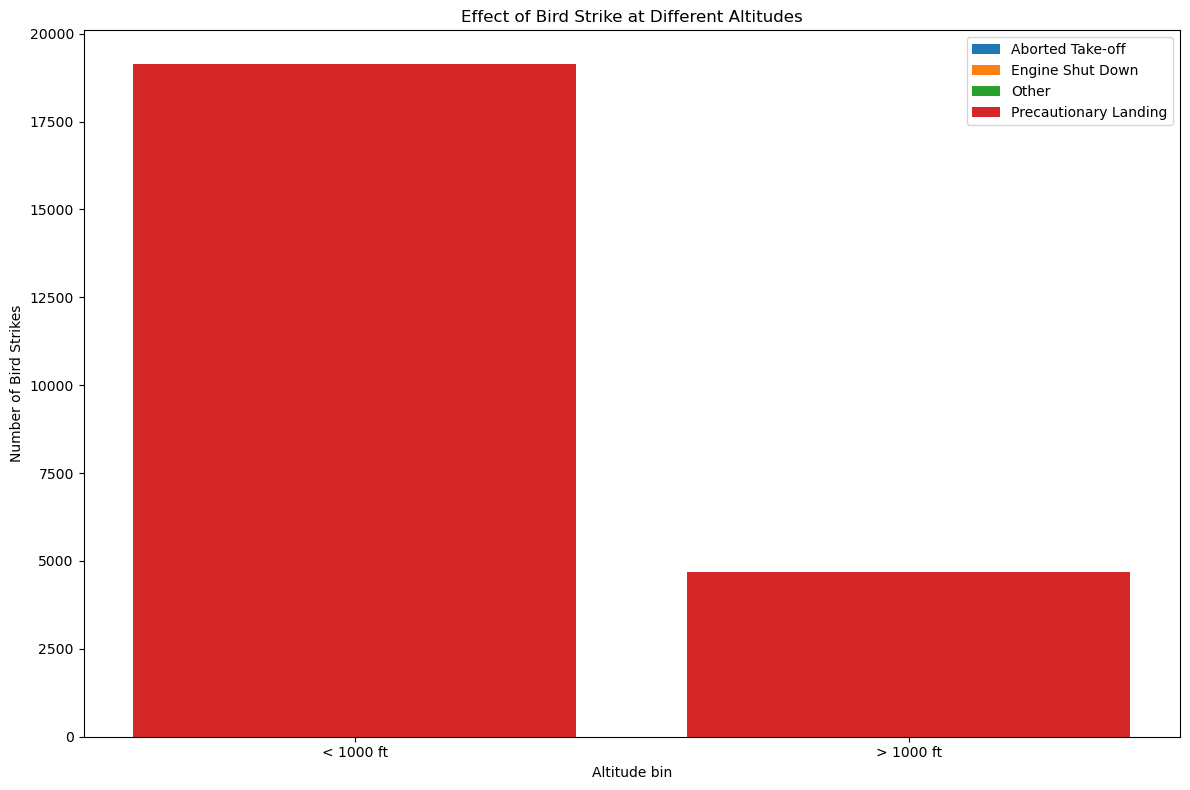

In [209]:
altitude_effect_counts = df.groupby(['Altitude bin', 'Effect: Impact to flight']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
altitude_bins = altitude_effect_counts.index
impact_types = altitude_effect_counts.columns
for impact_type in impact_types:
    plt.bar(altitude_bins, altitude_effect_counts[impact_type], label=impact_type)
plt.title('Effect of Bird Strike at Different Altitudes')
plt.xlabel('Altitude bin')
plt.ylabel('Number of Bird Strikes')
plt.legend()
plt.tight_layout()
plt.show()

- From above Bar chart says that Altitude of plane During the "Bird Strikes"

# Insights from Bird Strikes b/w 2000 - 2011 Data Analysis

### Analysis of bird strikes b/w 2000 - 2011 data highlights yearly trends, top affected airlines, and airports with the highest incidents, Annual costs underscore the financial impact  


### While most strikes occur during takeoff and landing phases, with altitude variations, often resulting in minor to moderate flight impacts and impacting flight safety